<a href="https://colab.research.google.com/github/HDWilliams/mnistDigitClassifier/blob/master/mnistDigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, datasets


In [0]:
#set up data transforms and import data
transform = transforms.Compose([transforms.ToTensor()])

#set up train and test dataloaders
trainset = datasets.MNIST('../mnist_data', download=True, train=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

testset = datasets.MNIST('../mnist_data', download=True, train=False, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle = True)


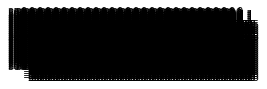

In [3]:
#visualize the images
#TODO: Fix display issues
def show_img(num):
  w=10
  h=10
  fig=plt.figure(figsize=(num, 1))
  columns = 28
  rows = 28
  for image, label in train_dataloader:
    for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      plt.imshow(image.view(-1, 28))
    break
  plt.show()
show_img(4)

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
#set up a Sequential model input 28*28, ouput 10 catagories
import torch.nn.functional as F
import torch.nn as nn

model = nn.Sequential(nn.Linear(28*28, 128), 
                      nn.ReLU(), 
                      nn.Linear(128, 64), 
                      nn.ReLU(), 
                      nn.Linear(64, 10), 
                      nn.LogSoftmax(dim=1)).to(device)

#loss criterion
criterion = nn.NLLLoss()
#optimizer
lr=.01
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


In [10]:
#set up train test code
epochs = 10

for i in range(epochs):
  running_loss = 0
  for image, label in train_dataloader:
    
    #zero grads for each pass through model
    optimizer.zero_grad()
    
    #resize images and send images and labels to GPU
    image = image.view(image.shape[0], -1)
    image, label = image.to(device), label.to(device)
    
    #pass each batch through the model
    output = model(image)
    
    #calculate loss, back propogate, gradient descent
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    
    #add up loss then print after each epoch
    running_loss += loss.item()
  print('Epoch: ', i, 'Loss: ', running_loss/len(train_dataloader))
  
  #set model to eval with no_grad tracking
  accuracy = 0
  with torch.no_grad():
    model.eval()
    for images, labels in test_dataloader:
      images = images.view(images.shape[0], -1)
      
      images, labels = images.to(device), labels.to(device)
      
      #model output is log_softmax must do exp to get actual value
      ps = torch.exp(model(images))
      
      #get top class
      topk, top_class = ps.topk(1, dim=1)
      
      #print accuracy
      results = top_class == labels.view(top_class.shape[0], 1)
      accuracy += torch.mean(results.type(torch.FloatTensor))
  print('Accuracy: ', (accuracy.item()/len(test_dataloader))*100, '%')
  model.train()
  
    

Epoch:  0 Loss:  0.16430920539038876
Accuracy:  96.02000000000001 %
Epoch:  1 Loss:  0.1471957941090067
Accuracy:  95.54 %
Epoch:  2 Loss:  0.1519453218307967
Accuracy:  95.41 %
Epoch:  3 Loss:  0.154054517046238
Accuracy:  95.24000000000001 %
Epoch:  4 Loss:  0.14453279988610496
Accuracy:  95.74000000000001 %
Epoch:  5 Loss:  0.15225821963272368
Accuracy:  95.19999999999999 %
Epoch:  6 Loss:  0.15330865694146292
Accuracy:  95.77 %
Epoch:  7 Loss:  0.15115810940964147
Accuracy:  95.87 %
Epoch:  8 Loss:  0.14904419819082057
Accuracy:  95.83 %
Epoch:  9 Loss:  0.1589305373805808
Accuracy:  95.47 %
